EDA Used Cars Toyota

Car Price Regression model
make a tool to predict car value



# No Missing Data

In [69]:
# Import Libraries for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [15]:
# Import Dataset
df= pd.read_csv('../data/toyota.csv')

In [16]:
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [96]:
# Shape of DataFrame (rows,columns)
df.shape

(6738, 9)

In [17]:
# Data Types
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [18]:
# All Toyota Models in dataset 
df['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [19]:
# All  transmissions in dataset 
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [20]:
# All  fuelType in dataset 
df['fuelType'].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [21]:
# model year  
df['year'].unique()

array([2016, 2017, 2015, 2020, 2013, 2019, 2018, 2014, 2012, 2005, 2003,
       2004, 2001, 2008, 2007, 2010, 2011, 2006, 2009, 2002, 1999, 2000,
       1998], dtype=int64)

In [22]:
# price  first 20
df['price'].unique()[0:20]

array([16000, 15995, 13998, 18998, 17498, 15998, 18522, 18995, 27998,
       13990, 10495, 17990, 16995, 23995, 18498, 23980, 17995, 12998,
       23495, 25780], dtype=int64)

In [23]:
# mileage of first 20 cars
df['mileage'].unique()[0:20]

array([24089, 18615, 27469, 14736, 36284, 26919, 10456, 12340,   516,
       37999, 72000, 12597, 36100,   995, 35228,  1751, 16444, 25499,
        3934,  5123], dtype=int64)

In [24]:
# road tax
df['tax'].unique()[0:20]

array([265, 145, 150, 260, 200, 250, 140, 135, 235, 300, 125,  20, 160,
       165, 205, 240, 330, 325,   0,  30], dtype=int64)

In [25]:
# miles per gallon
df['mpg'].unique()[0:20]

array([36.2, 33.2, 32.8, 39.8, 85.6, 36.7, 72.4, 39.2, 78.5, 58.9, 53.3,
       62.8, 56.5, 57.7, 37.2, 34.5, 35.3, 40.4, 51.1, 57.6])

In [26]:
# size in litres
df['engineSize'].unique()[0:20]

array([2. , 1.8, 1.2, 1.6, 1.4, 2.5, 2.2, 1.5, 1. , 1.3, 0. , 2.4, 3. ,
       2.8, 4.2, 4.5])

In [27]:
# Missing Data
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [28]:
# Cardinality of data
df.nunique()

model             18
year              23
price           2114
transmission       4
mileage         5699
fuelType           4
tax               29
mpg               81
engineSize        16
dtype: int64

Text(0.5, 1.0, 'Cardinality')

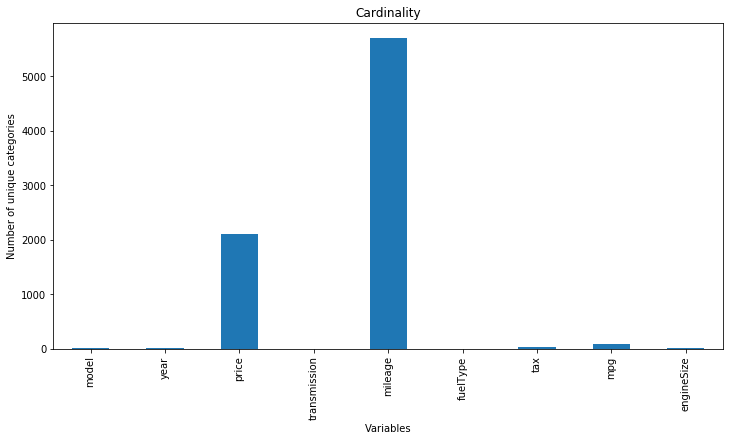

In [30]:
# plot cardinality of data
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [33]:
# Rare Categories [model, transmission, fueltype]
df['model'].value_counts()

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

In [34]:
df['transmission'].value_counts()

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

In [35]:
df['fuelType'].value_counts()

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

In [45]:
# calculate the frequency for each category
label_freq = df['model'].value_counts() / len(df)
label_freq

 Yaris            0.314930
 Aygo             0.291036
 Auris            0.105669
 C-HR             0.071089
 RAV4             0.070199
 Corolla          0.039626
 Prius            0.034432
 Avensis          0.017067
 Verso            0.016919
 Hilux            0.012763
 GT86             0.010834
 Land Cruiser     0.007569
 PROACE VERSO     0.002226
 Supra            0.001781
 Camry            0.001633
 IQ               0.001187
 Urban Cruiser    0.000594
 Verso-S          0.000445
Name: model, dtype: float64

In [41]:
label_freq2 = df['transmission'].value_counts() / len(df)
label_freq2

Manual       0.567824
Automatic    0.394331
Semi-Auto    0.037697
Other        0.000148
Name: transmission, dtype: float64

In [42]:
label_freq3 = df['fuelType'].value_counts() / len(df)
label_freq3

Petrol    0.606560
Hybrid    0.303206
Diesel    0.074651
Other     0.015583
Name: fuelType, dtype: float64

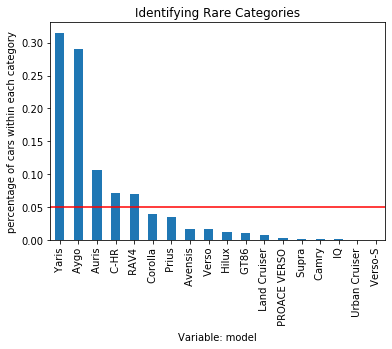

In [46]:
# plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar()
# add a line to signal 5 % frequency limit under which we will consider a category as rare
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: model')
fig.set_title('Identifying Rare Categories')
plt.show()

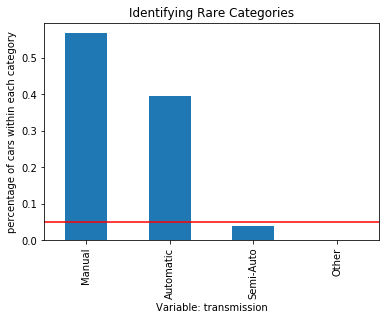

In [44]:
# plot with the category frequencies
fig = label_freq2.sort_values(ascending=False).plot.bar()
# add a line to signal 5 % frequency limit under which we will consider a category as rare
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: transmission')
fig.set_title('Identifying Rare Categories')
plt.show()

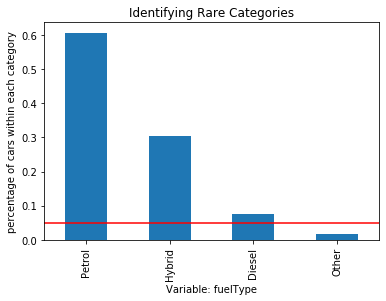

In [47]:
# plot with the category frequencies
fig = label_freq3.sort_values(ascending=False).plot.bar()
# add a line to signal 5 % frequency limit under which we will consider a category as rare
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: fuelType')
fig.set_title('Identifying Rare Categories')
plt.show()

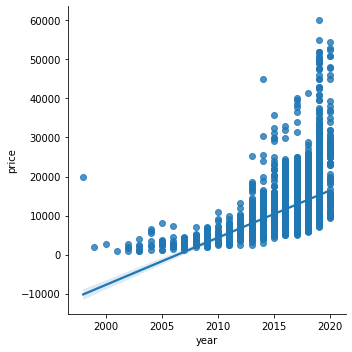

In [50]:
# linear relationships between year and price
sns.lmplot(x="year", y="price", data=df, order=1)

Text(0.5, 6.79999999999999, 'Independent variable')

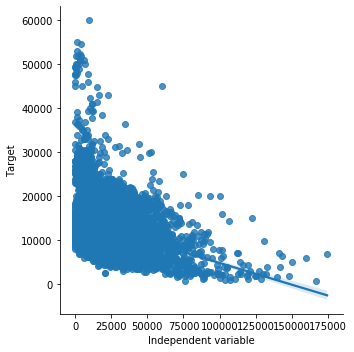

In [53]:
# linear relationships between mileage and price
sns.lmplot(x="mileage", y="price", data=df, order=1)
plt.ylabel('Target')
plt.xlabel('Independent variable')

Text(0.5, 6.79999999999999, 'Independent variable')

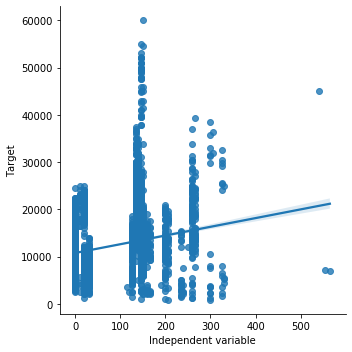

In [56]:
# linear relationships between tax and price
sns.lmplot(x="tax", y="price", data=df, order=1)
plt.ylabel('Target')
plt.xlabel('Independent variable')

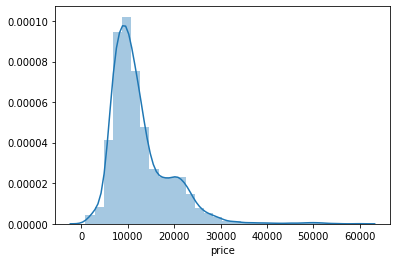

In [59]:
### Normal Distribution ### price, year , mileage,tax, mpg, engineSize

sns.distplot(df['price'], bins=30)

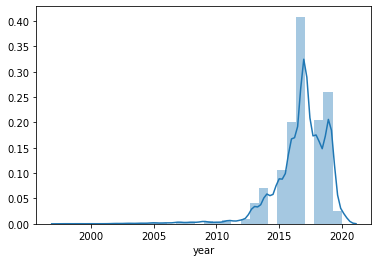

In [61]:
sns.distplot(df['year'], bins=30)

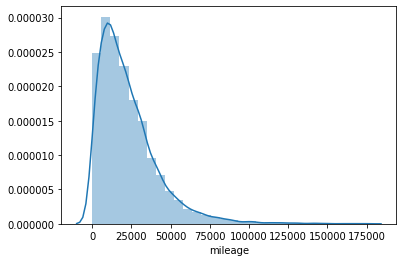

In [62]:
sns.distplot(df['mileage'], bins=30)

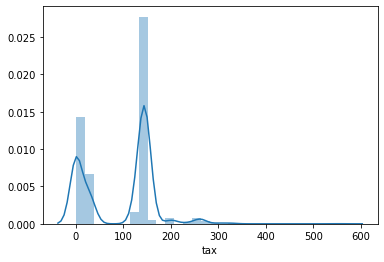

In [63]:
sns.distplot(df['tax'], bins=30)

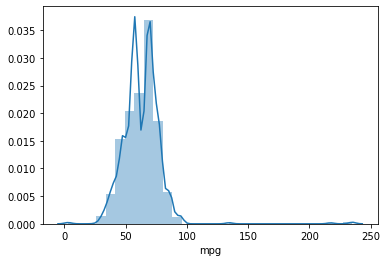

In [64]:
sns.distplot(df['mpg'], bins=30) 

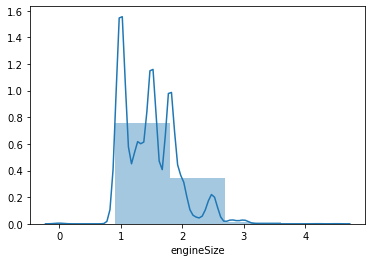

In [67]:
sns.distplot(df['engineSize'], bins=5)

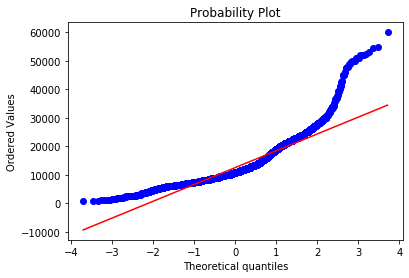

In [70]:
# Q-Q plots
stats.probplot(df['price'], dist="norm", plot=plt) 
plt.show()

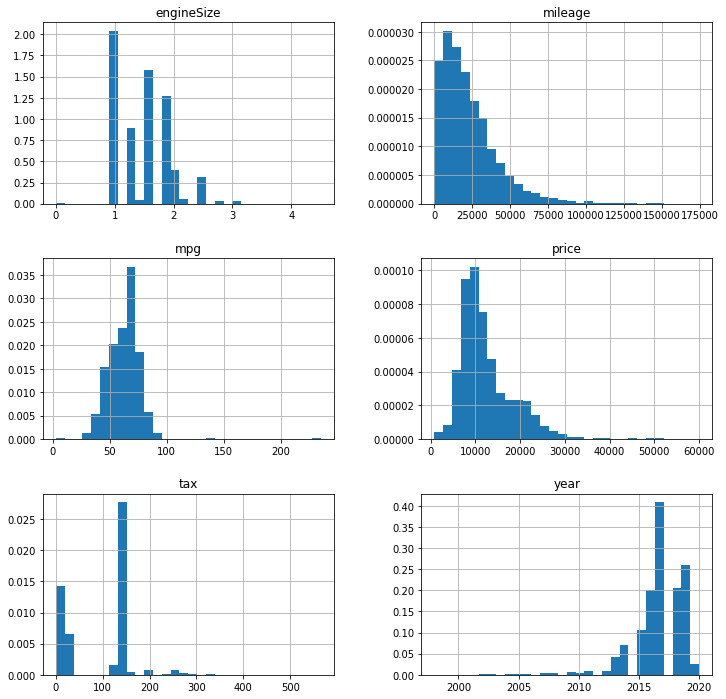

In [72]:
# Distinguishing-variable-distribution
df.hist(bins=30, figsize=(12,12), density=True) 
plt.show()

Text(0.5, 1.0, 'Boxplot')

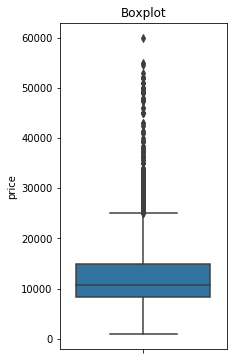

In [73]:
# Outliers
plt.figure(figsize=(3,6))  
sns.boxplot(y=df['price']) 
plt.title('Boxplot')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

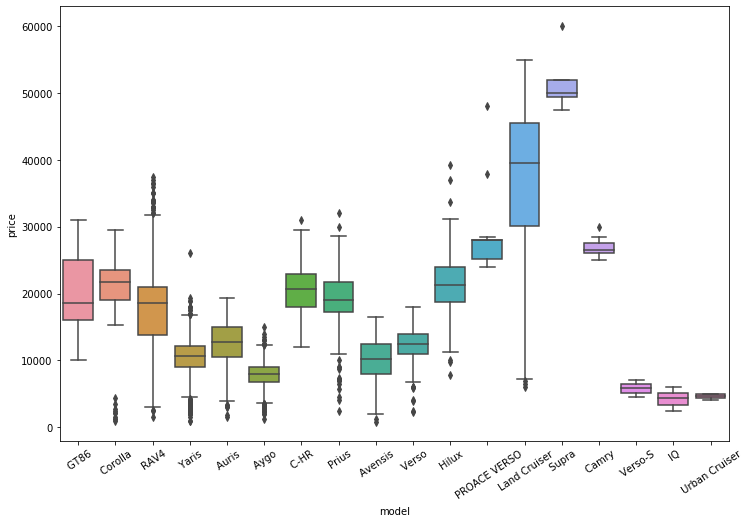

In [105]:
plt.figure(figsize=(12,8))
sns.boxplot(x='model',y='price',data=df)
plt.xticks(rotation=34)


In [74]:
# not let's find in a dataframe those outliers:
def find_boundaries(df, variable): 
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)
    return upper_boundary, lower_boundary

In [98]:
upper_boundary, lower_boundary = find_boundaries(df, 'mileage')                                                                                                                       
upper_boundary, lower_boundary

(63490.375, -22980.625)

In [76]:
# let's flag the outliers in the data set
outliers = np.where(df['price'] > upper_boundary, True, np.where(df['price'] < lower_boundary, True, False))

In [77]:
# how many outliers did we find?
outliers.sum()

258

In [78]:
# let's print a few of them
outliers_df = df.loc[outliers, 'price'] 
outliers_df.head()

8     27998
19    25780
20    26995
22    26995
25    31000
Name: price, dtype: int64

In [97]:
upper_boundary, lower_boundary = find_boundaries(df, 'year')                                                                                                                       
upper_boundary, lower_boundary

(2021.0, 2013.0)

In [99]:
upper_boundary, lower_boundary = find_boundaries(df, 'tax')                                                                                                                       
upper_boundary, lower_boundary

(362.5, -217.5)

In [100]:
upper_boundary, lower_boundary = find_boundaries(df, 'mpg')                                                                                                                       
upper_boundary, lower_boundary

(89.4, 35.0)

In [101]:
upper_boundary, lower_boundary = find_boundaries(df, 'engineSize')                                                                                                                       
upper_boundary, lower_boundary

(3.0, -0.20000000000000018)

In [95]:
# Comparing-feature-magnitude
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6738.0,2016.748145,2.204062,1998.0,2016.0,2017.0,2018.00,2020.0
price,6738.0,12522.391066,6345.017587,850.0,8290.0,10795.0,14995.00,59995.0
mileage,6738.0,22857.413921,19125.464147,2.0,9446.0,18513.0,31063.75,174419.0
tax,6738.0,94.697240,73.880776,0.0,0.0,135.0,145.00,565.0
mpg,6738.0,63.042223,15.836710,2.8,55.4,62.8,69.00,235.0
engineSize,6738.0,1.471297,0.436159,0.0,1.0,1.5,1.80,4.5
